Step 1: Process the data.

In [ ]:
import os
import pandas as pd
from itertools import product
from data_process import process_data

summary_dict = {}

years = ['10 years', '20 years', '30 years', '40 years', 'lifetime']
genders = ['female', 'male', 'both']
strategies = ['Base', 'Intervention']

combinations = product(years, genders, strategies)

for year, gender, strategy in combinations:
    input_file_path_alldata = f'../01_input/TreeAgePro/{year}/{gender}/{strategy}_all_values.xlsx'
    summary_dict = process_data(input_file_path_alldata, summary_dict, gender, strategy, year)
    summary_df = pd.DataFrame(summary_dict)
    summary_df.to_csv(f'../02_output/summary/summary_{year}_{gender}_{strategy}.csv', index=False)

print('Summary files were created successfully.')

Step 2: Combine and integrate the data for the tables.

In [3]:
import os
import pandas as pd
from itertools import product
from data_combine import process_summary_data
from plot_line import create_summary_plot
from data_intergrate import calculate_all_variables

folder_path = "../02_output/summary"
input_base_path = "../01_input/TreeAgePro/trials"
data_t, data_pivot = process_summary_data(folder_path, input_base_path)

population = {'both': 24979035, 'female': 11906872, 'male': 13072163}
years = ['10 years', '20 years', '30 years', '40 years', 'lifetime']
genders = ['both', 'female', 'male']
strategies = ['Base', 'Intervention']

result_df, _ = calculate_all_variables(data_pivot, data_t, population, years, genders, strategies, flag_abs=False, flag_format=True)
result_df.drop_duplicates(inplace=True)

result_df.to_csv('../02_output/summary_table_False_True.csv', index=False)

_, df_plot = calculate_all_variables(data_pivot, data_t, population, years, genders, strategies, flag_abs=False, flag_format=False)
df_plot.drop_duplicates(inplace=True)

df_plot.to_csv('../02_output/summary_plot_bar_False_False.csv', index=False)

Step 3: Create the plots.

d:\Program Files (x86)\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


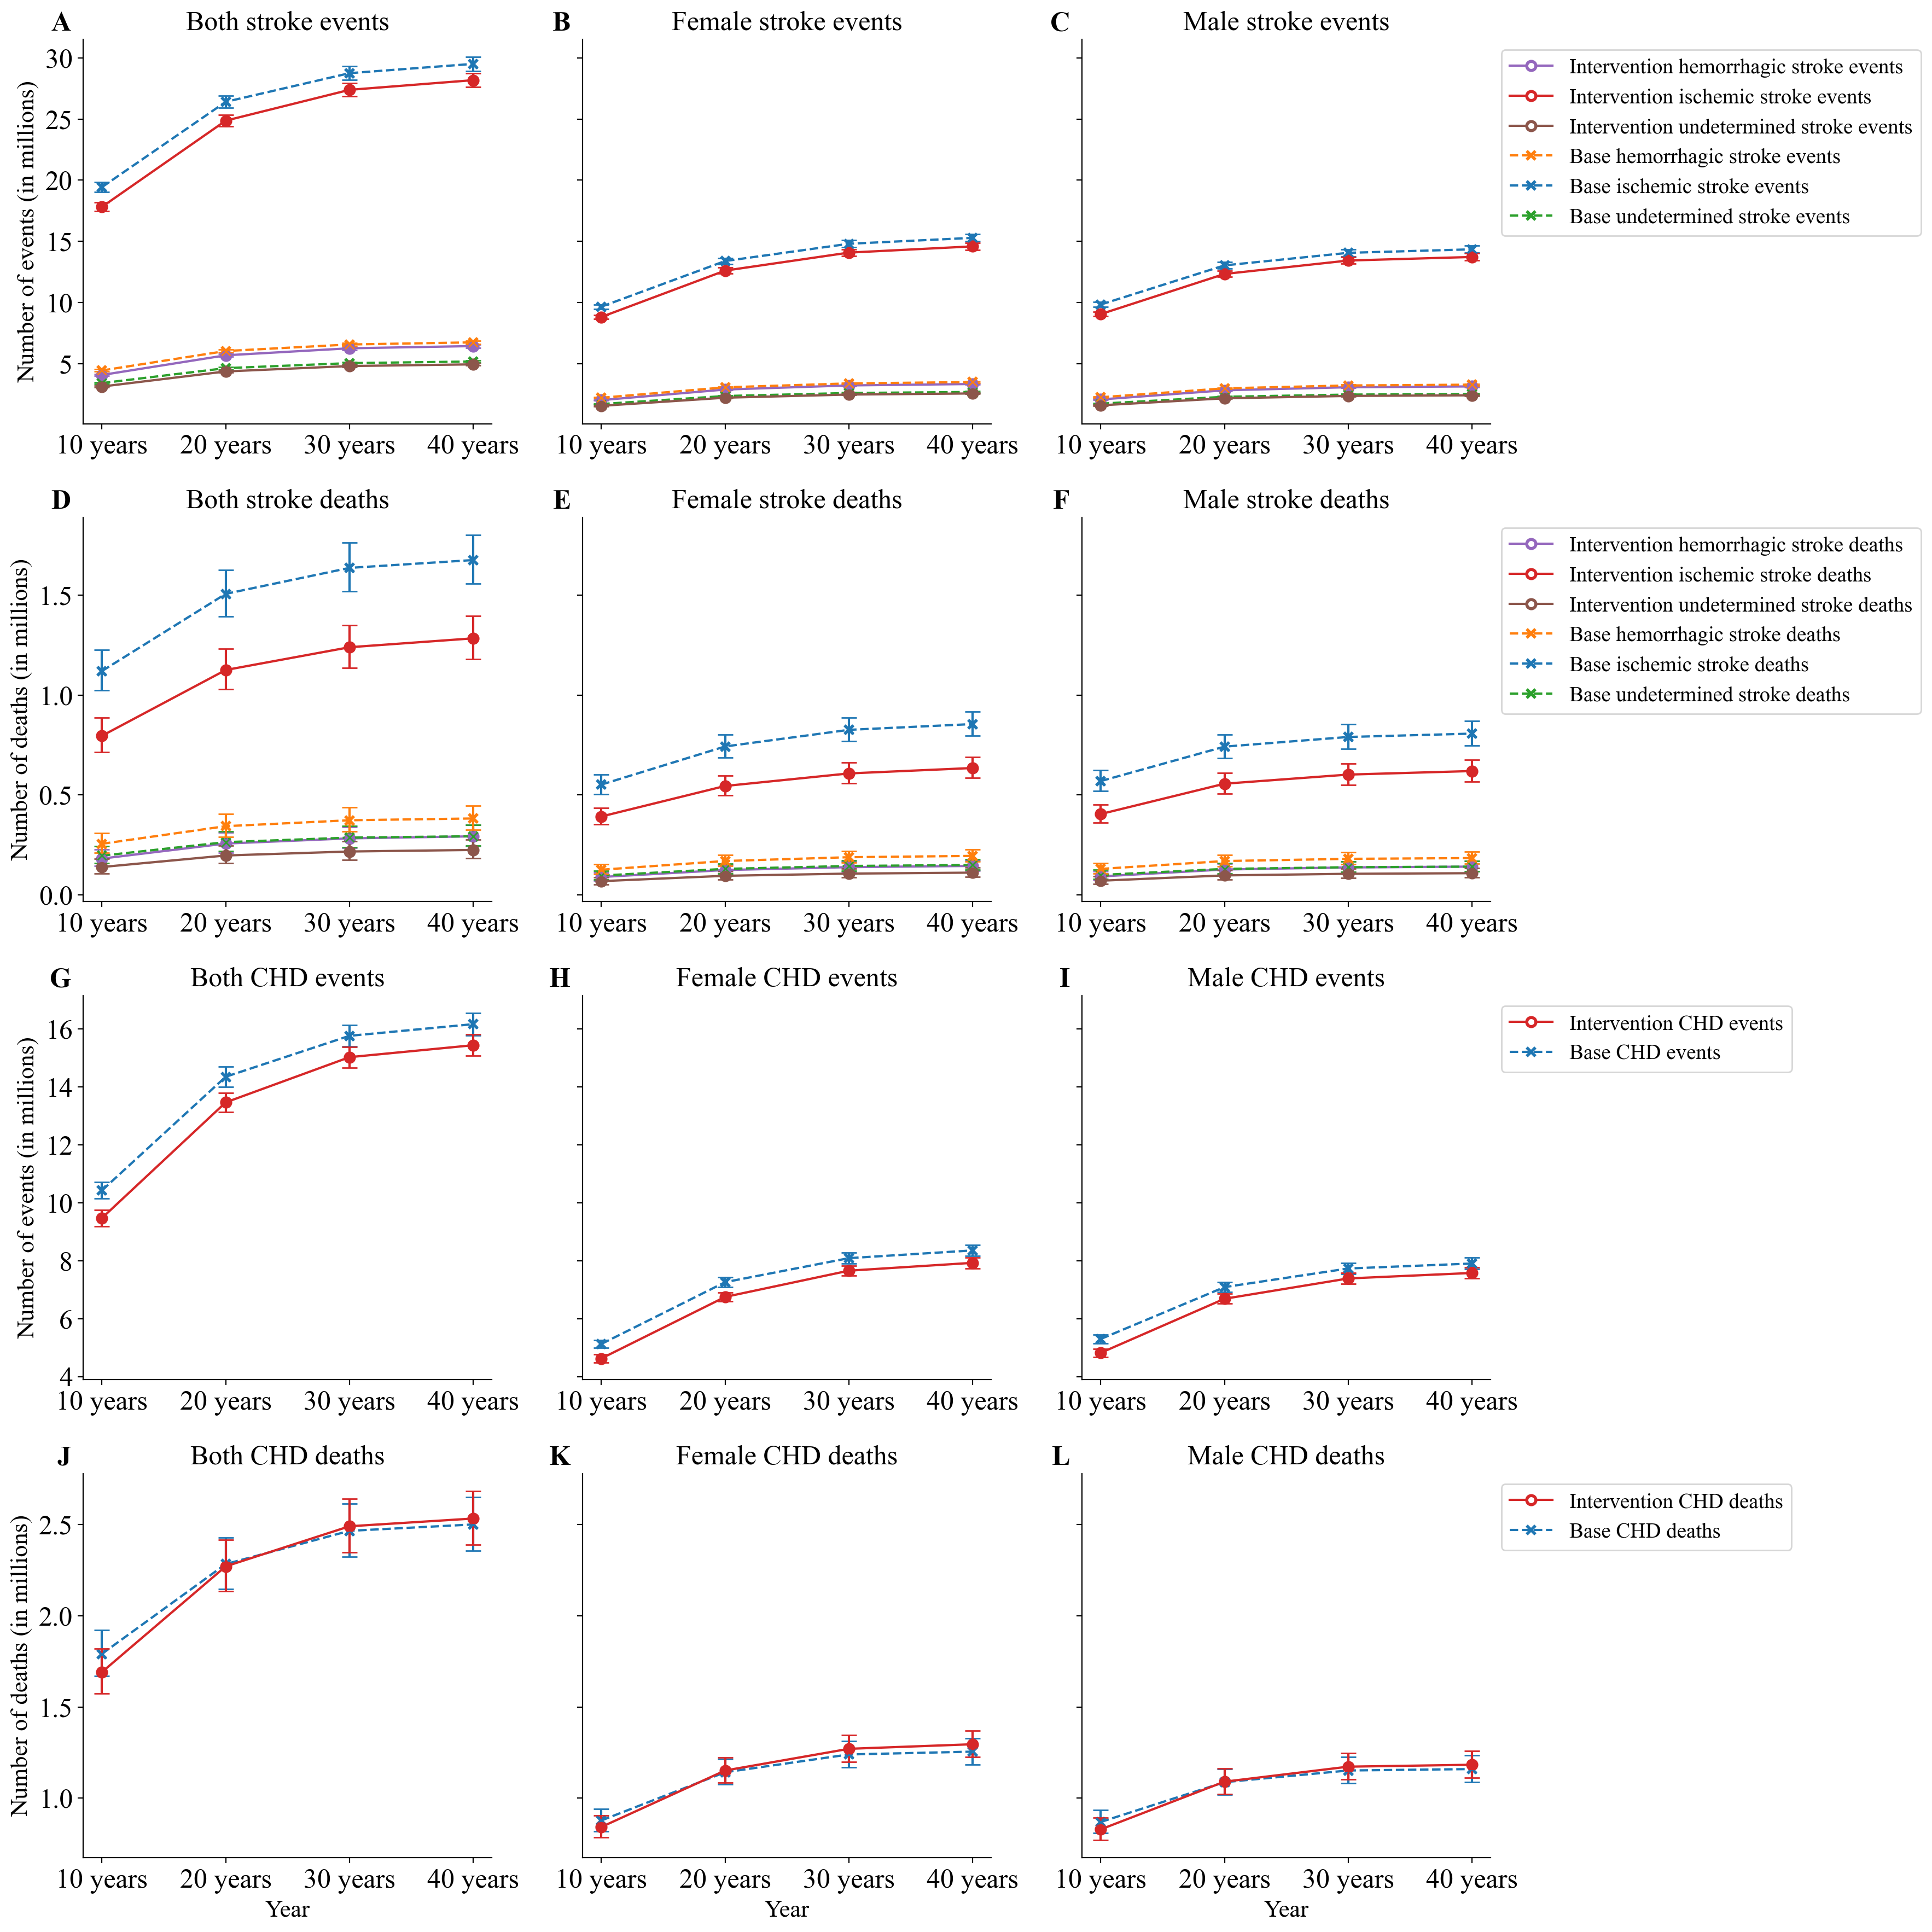

In [2]:

from plot_line import create_summary_plot

year_include = ['10 years', '20 years', '30 years', '40 years']
data_t = data_t[data_t['Year'].isin(year_include)]
population = {'both': 24979035, 'female': 11906872, 'male': 13072163}
plot_path = '../04_plot/plot_line.pdf'
# colors = ['CornflowerBlue', 'LightSkyBlue', 'DarkSeaGreen', 'Tomato', 'LightSalmon', 'MediumOrchid']
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']
markers = ['x', 'o']
linestyles = ['--', '-']
create_summary_plot(data_t, population, colors, markers, linestyles, plot_path)

d:\Program Files (x86)\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


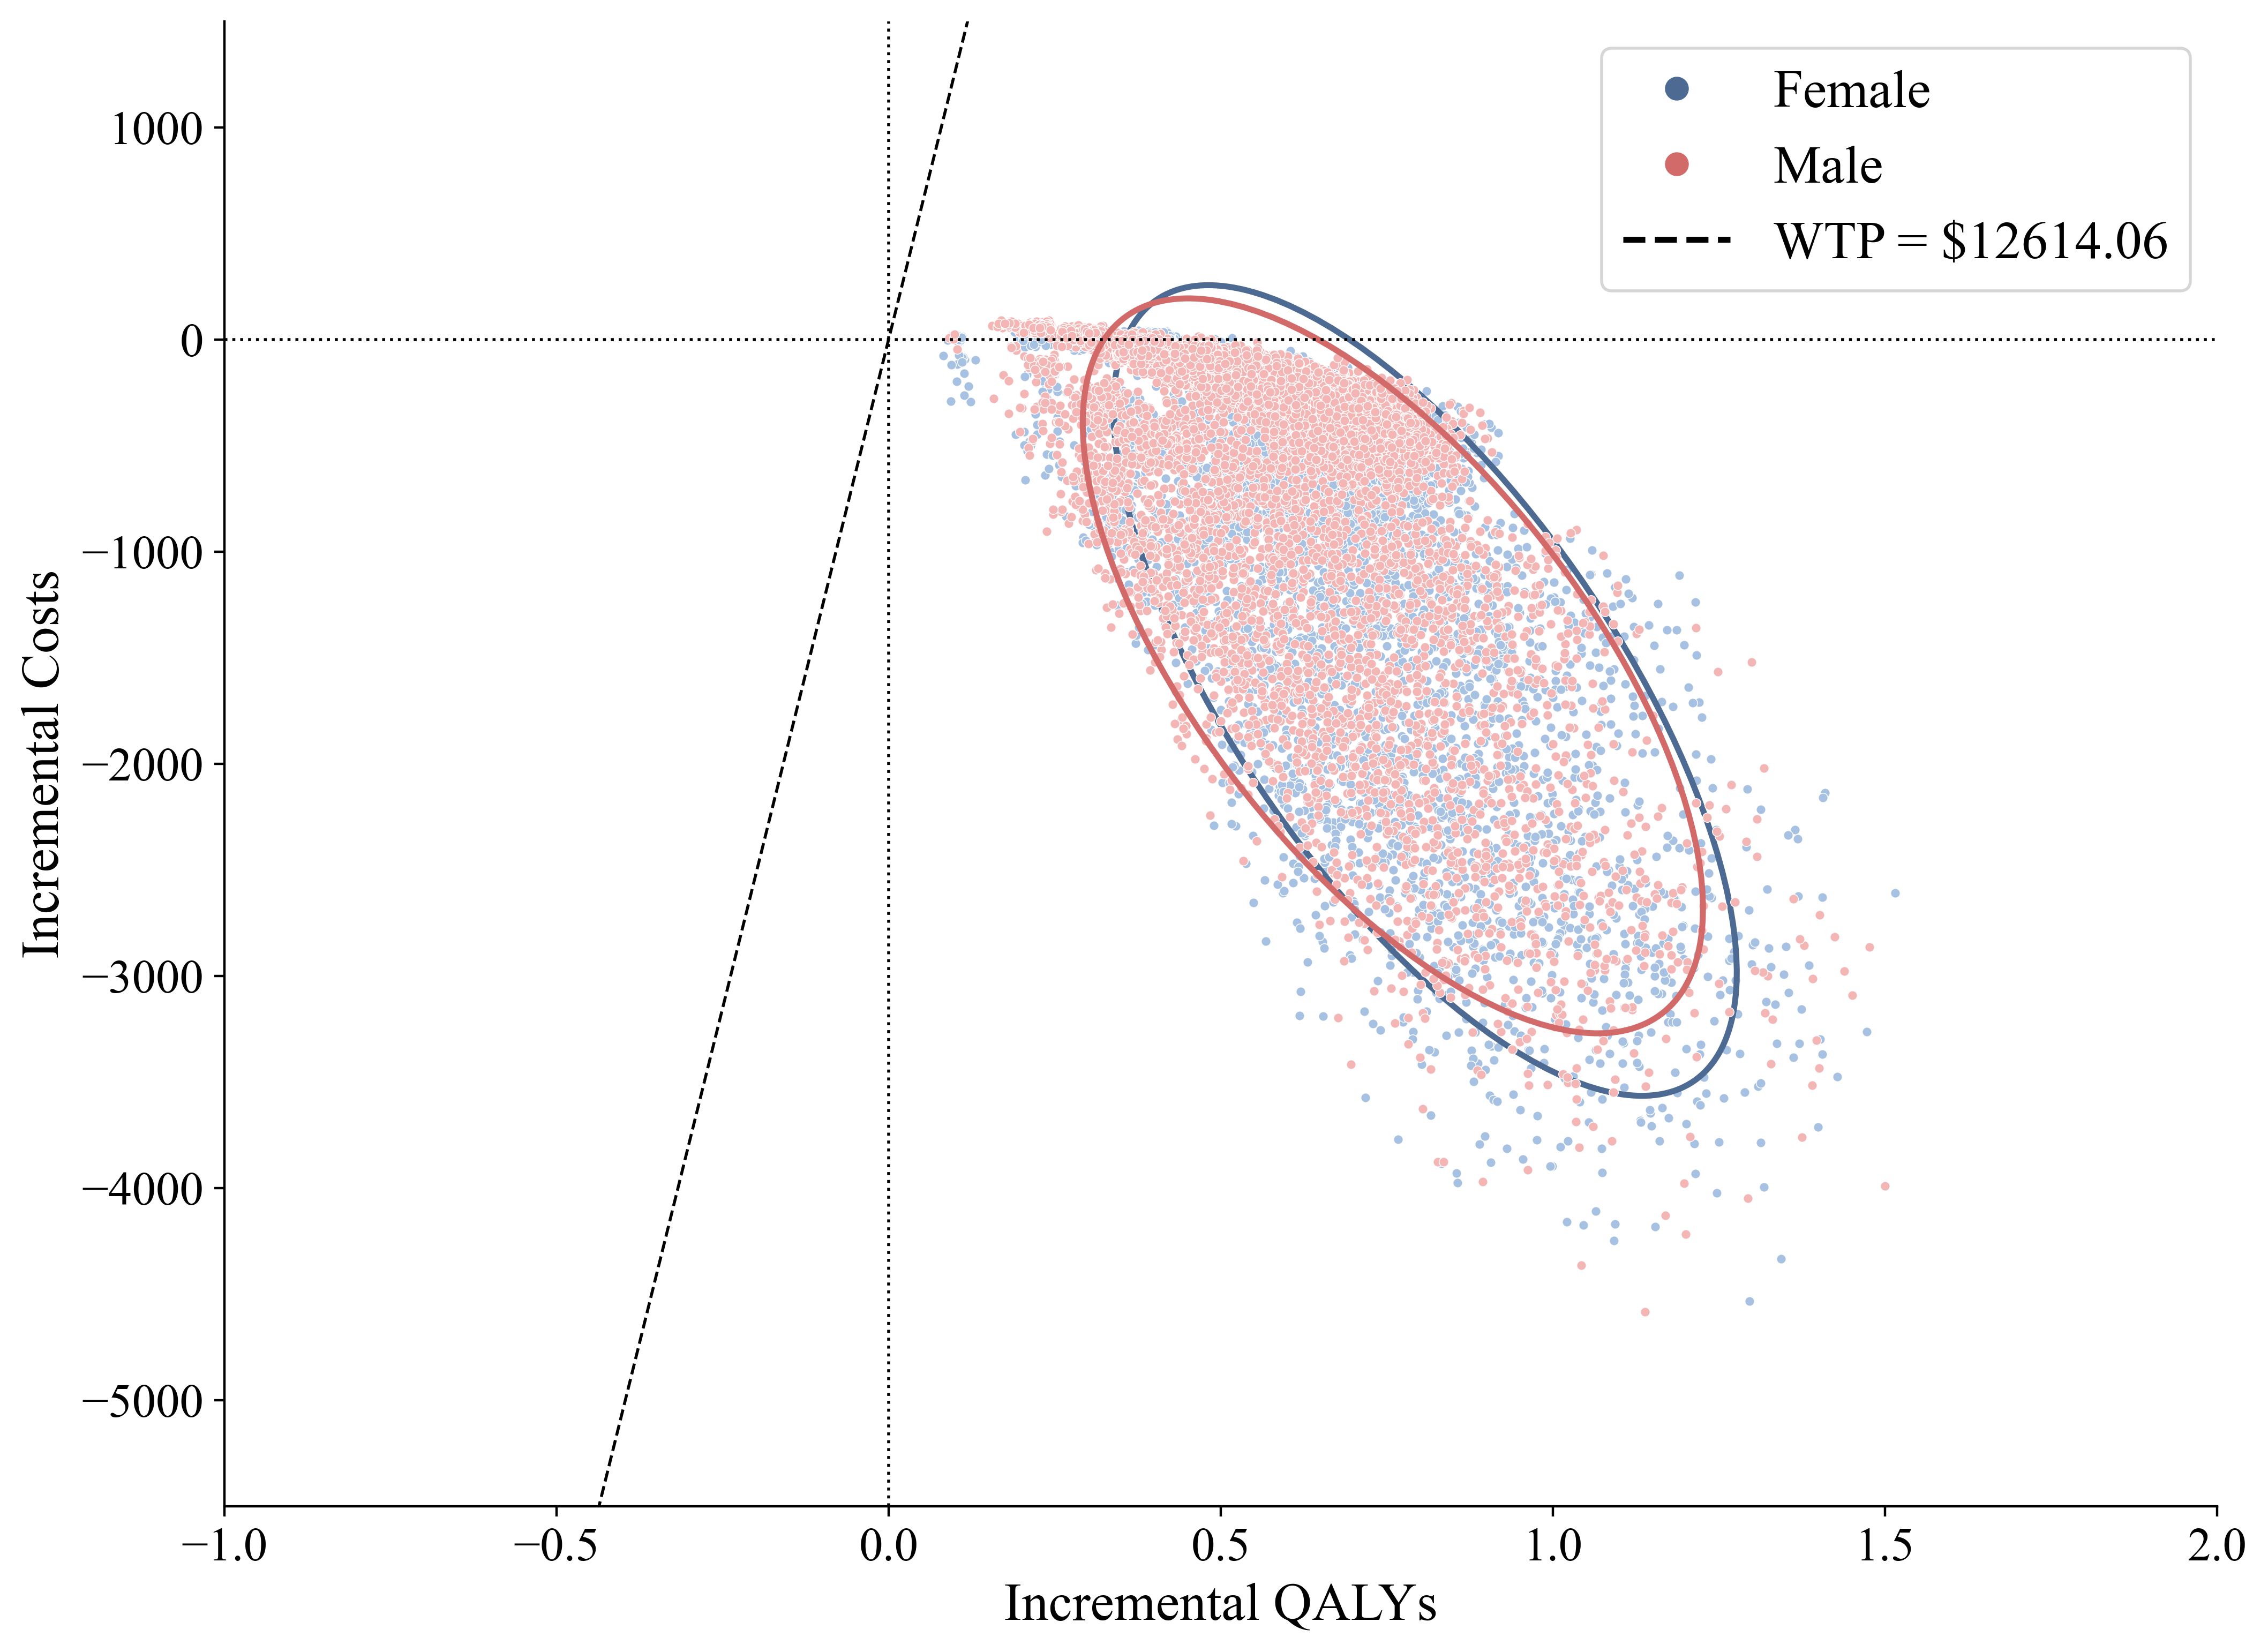

In [3]:
import pandas as pd
from plot_ICE import create_ice_plot

female_data = pd.read_excel('../01_input/TreeAgePro/PSA/female_ICE.xlsx', skiprows=2)
male_data = pd.read_excel('../01_input/TreeAgePro/PSA/male_ICE.xlsx', skiprows=2)

WTP_value = 12614.06

female_color_scatter = '#A6C1E2'
female_color_line = '#4C6A92'
male_color_scatter = '#F4B5B5'
male_color_line = '#D26A6A'
WTP_color = 'black'
colors = [female_color_scatter, female_color_line, male_color_scatter, male_color_line, WTP_color]

plot_path = '../04_plot/plot_ICE.pdf'

create_ice_plot(female_data, male_data, WTP_value, colors, plot_path)

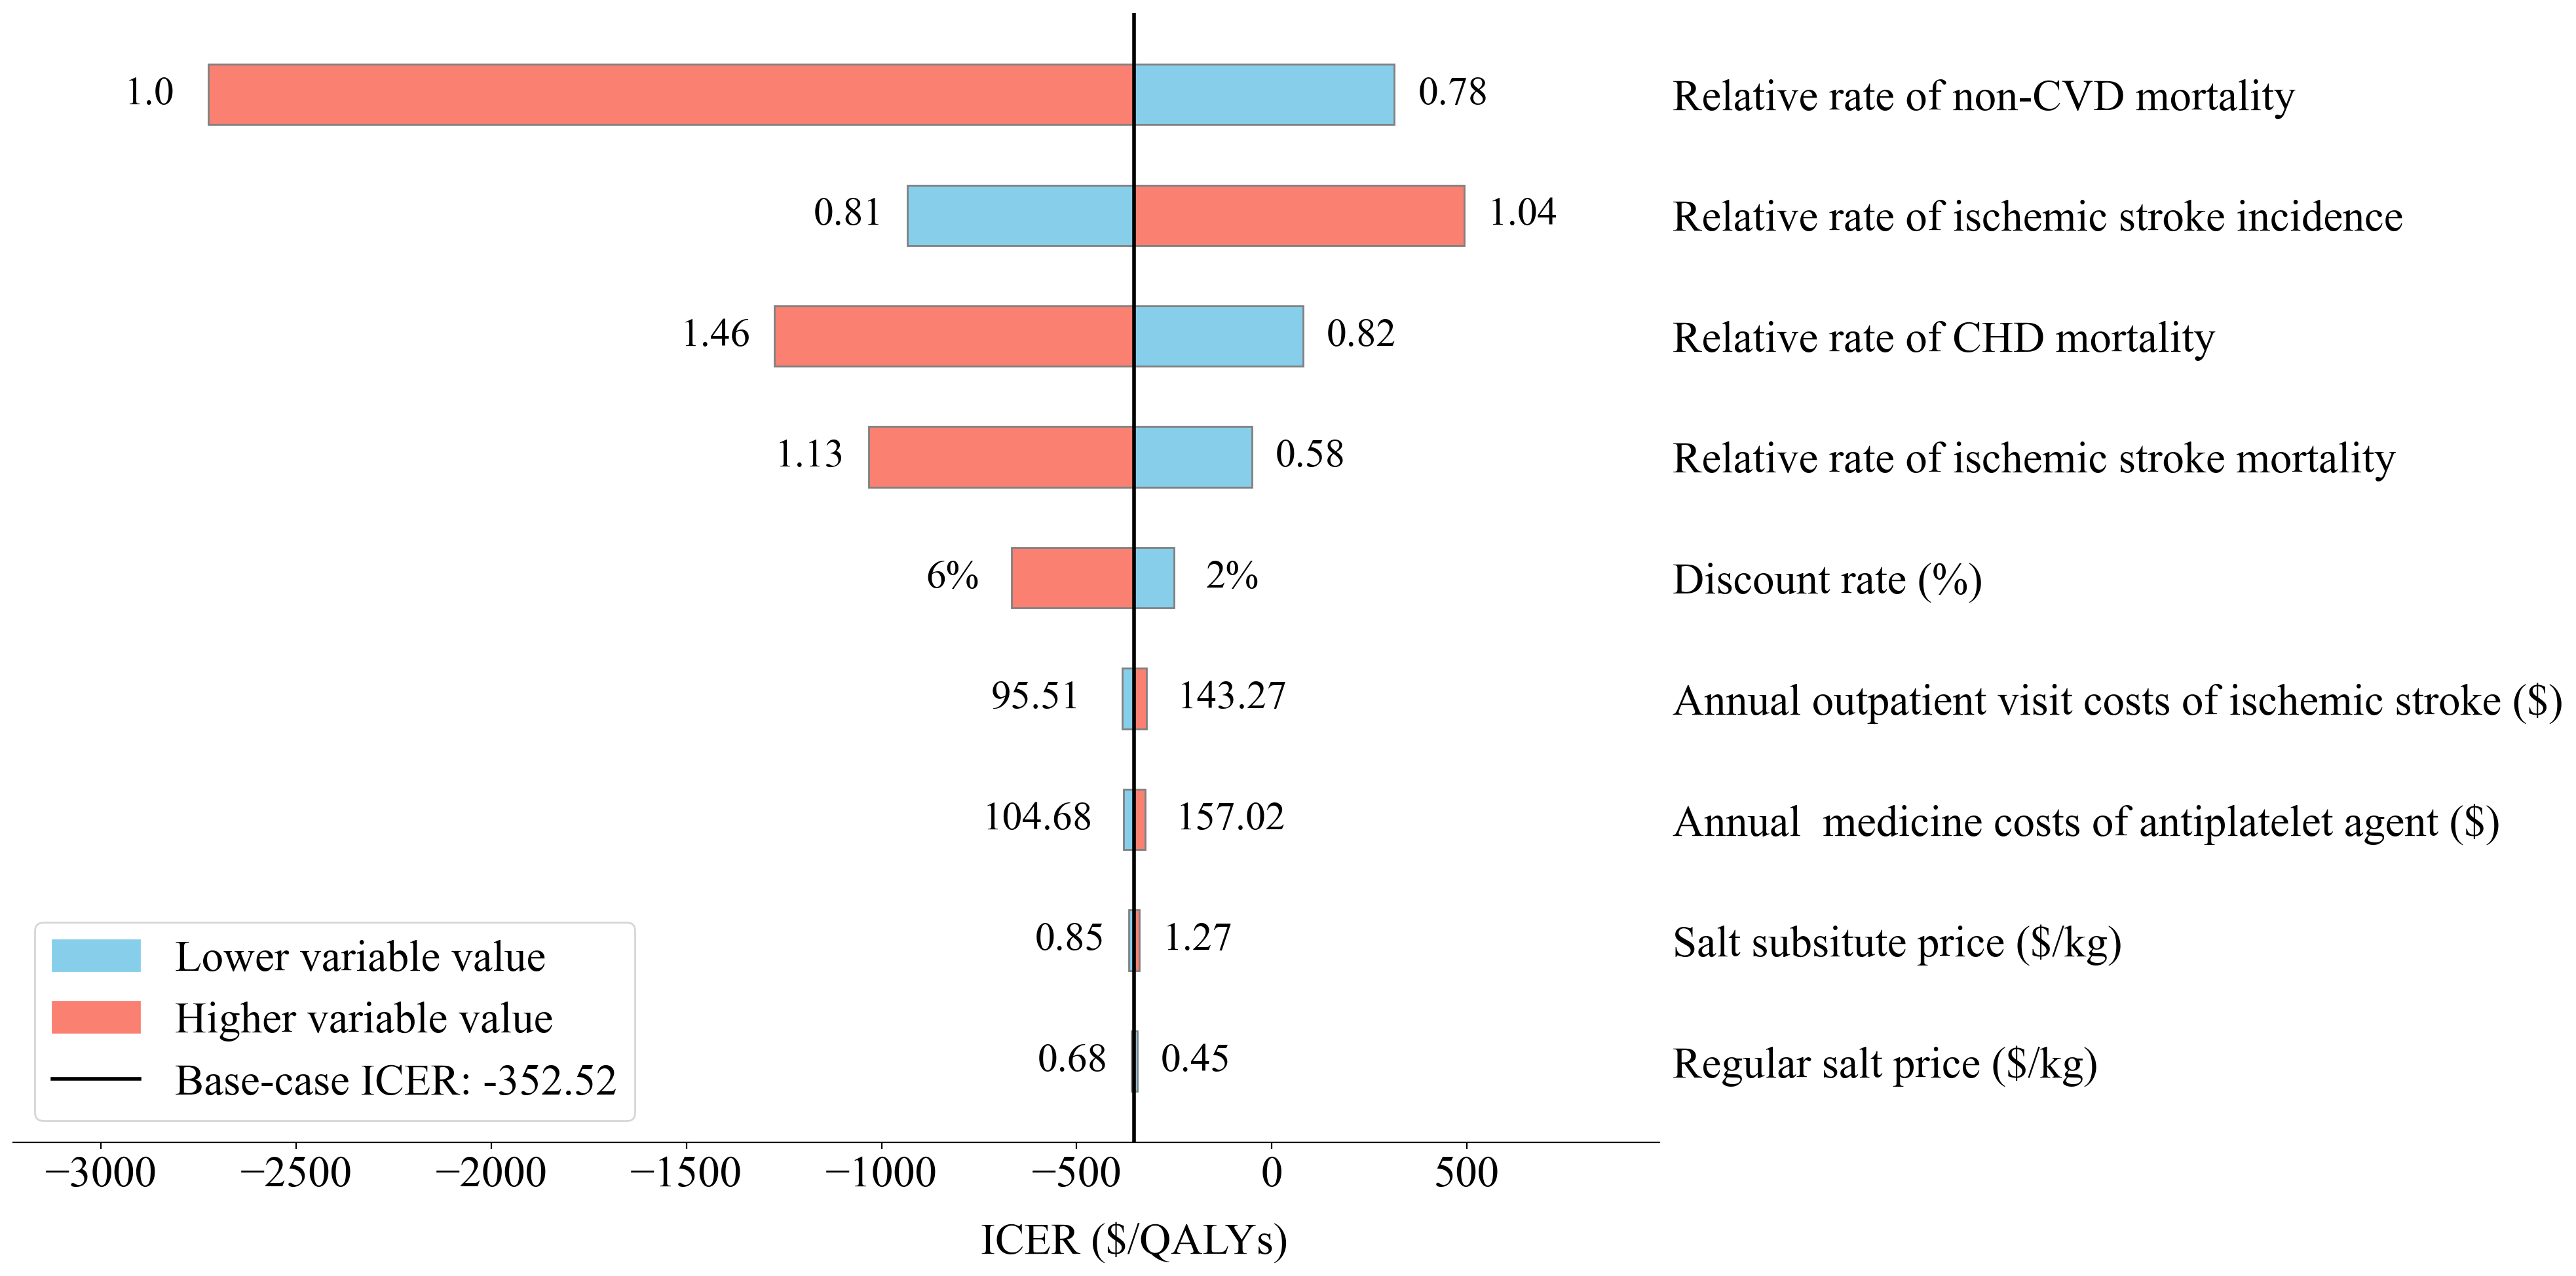

In [4]:
import pandas as pd
from plot_tornado import create_tornado_diagram

base_case_icer = -352.52
tornado_data = pd.read_excel('../01_input/TreeAgePro/tornado/tornado_variable.xlsx', skiprows=1)
output_pdf_path = '../04_plot/plot_tornado.pdf'

create_tornado_diagram(tornado_data, output_pdf_path, base_case_icer)

d:\Program Files (x86)\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


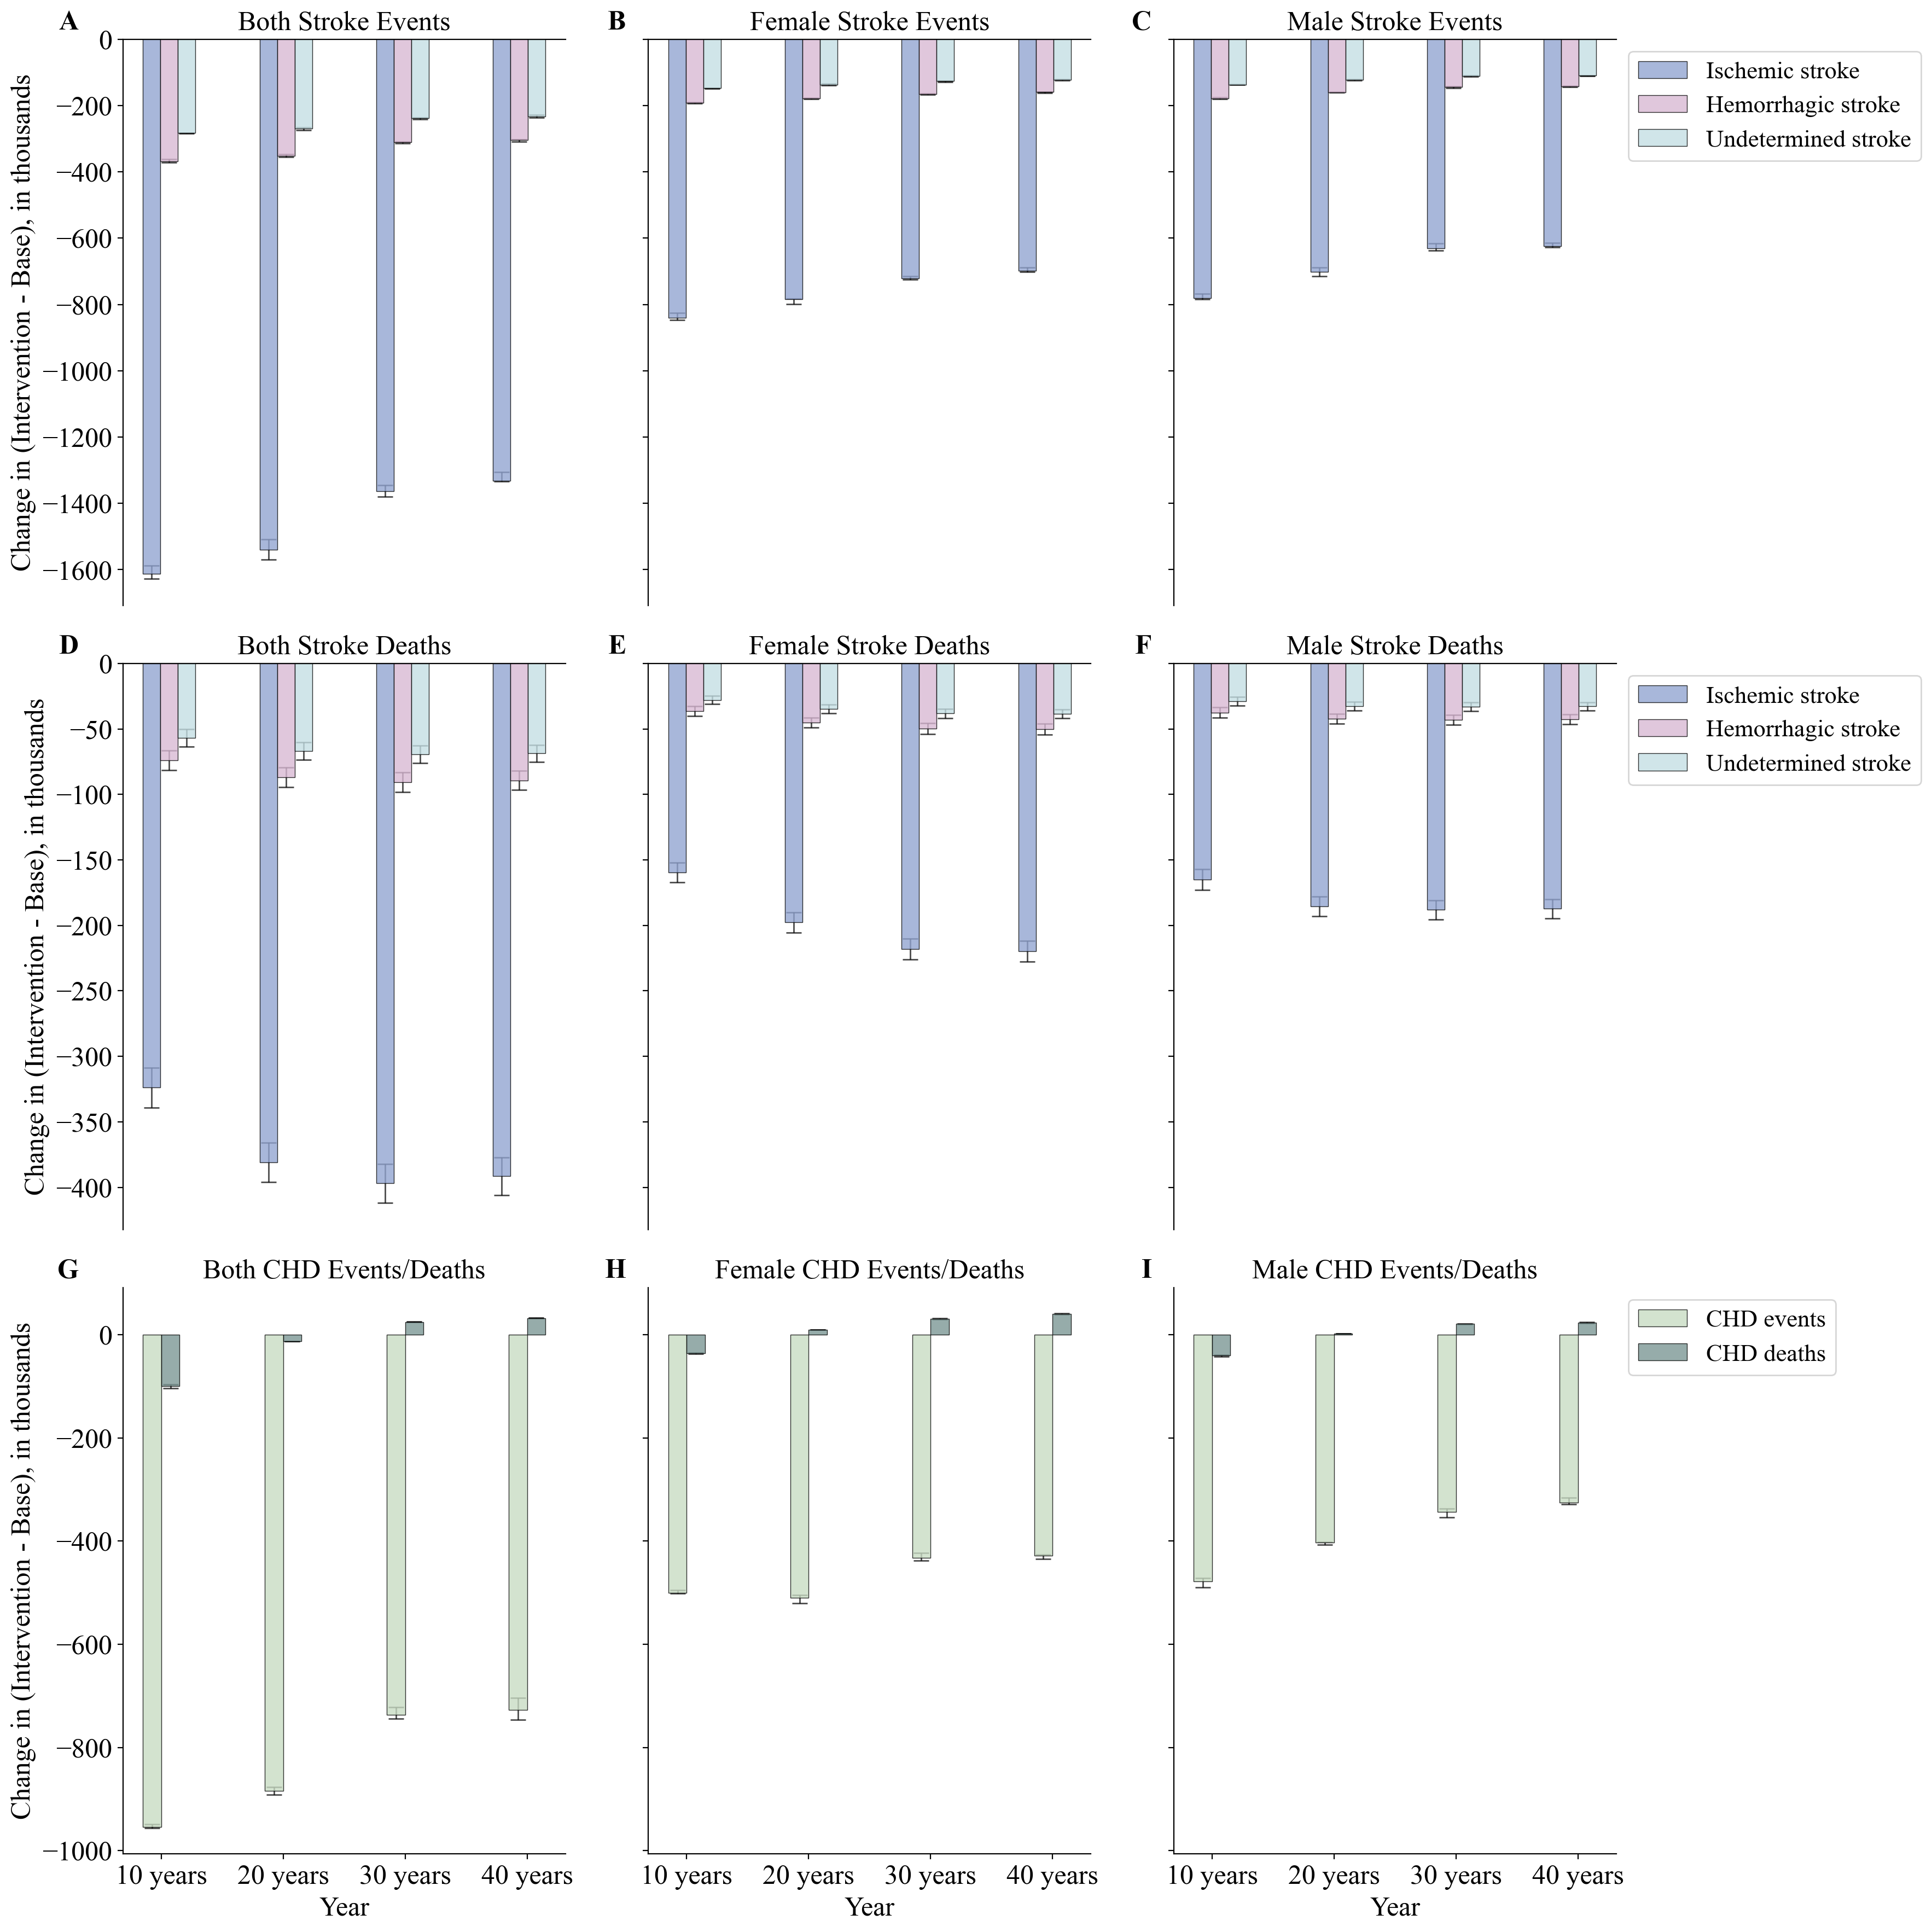

In [1]:
import pandas as pd
from plot_bar import create_summary_plot_bar

flag_abs = False
flag_format = False
df_plot = pd.read_csv(f'../02_output/summary_plot_bar_{flag_abs}_{flag_format}.csv')

year_include = ['10 years', '20 years', '30 years', '40 years']
df_plot = df_plot[df_plot['Year'].isin(year_include)]

colors = [
    '#92A5D1',  # Ischemic stroke
    '#D9B9D4',  # Hemorrhagic stroke
    '#C5DFE4',  # Undetermined stroke
    '#C9DCC4',  # CHD events
    '#7C9895'  # CHD deaths
]

output_pdf_path = '../04_plot/plot_bar.pdf'

create_summary_plot_bar(df_plot, colors, output_pdf_path)